#Colab 1: Learn to use Apache Spark with Python (30 points)

In this lab you will learn how to use [Apache Spark](https://spark.apache.org) on a Colab enviroment.

### **Setup**

Let's setup Spark on your Colab environment.  Run the cell below!

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


print('fin')

Now we authenticate a Google Drive client to download files. Please follow the instruction to enter the authoriztion code.


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Now download the file we will be processing in our Spark job.

In [ ]:
id='11xoXxyX1rFB-EabHt1cqRkf5nULcs25t'
downloaded = drive.CreateFile({'id': id}) 
downloaded.GetContentFile('game-clicks.csv.gz') 

id='1ji6ulH3Q56wGIdCSBgglUQn4-irJXVYX'
downloaded = drive.CreateFile({'id': id}) 
downloaded.GetContentFile('ad-clicks.csv.gz') 


If you executed the cells above, you should be able to see the files under the "Files/content" folder on the left panel.

Import libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

Initialize the Spark context.


In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

## **Load `game-clicks` and `ad-clicks` datasets**



Load the datasets:

In [ ]:
gameclicks = spark.read.csv("game-clicks.csv.gz", header='true')
adclicks = spark.read.csv("ad-clicks.csv.gz", header='true')

Check the schemas:

In [ ]:
gameclicks.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- clickId: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- userSessionId: string (nullable = true)
 |-- isHit: string (nullable = true)
 |-- teamId: string (nullable = true)
 |-- teamLevel: string (nullable = true)



In [ ]:
adclicks.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: string (nullable = true)
 |-- userSessionId: string (nullable = true)
 |-- teamId: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- adId: string (nullable = true)
 |-- adCategory: string (nullable = true)



Get a formatted sample with `show()`:

In [ ]:
gameclicks.show()

Find the number of records:

In [ ]:
print("In total there are {0} game clicks".format(gameclicks.count()))

print("In total there are {0} ad clicks".format(adclicks.count()))


In total there are 755806 game clicks
In total there are 16323 ad clicks


## **Question 1: How many users in each team?**
Keywords: `Dataframe API`, `SQL`, `group by`, `sort`

Use [DataFrame API](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame) to group the users by `teamID` and count how many distinct users in each team. Sort the result in descending order.

In [ ]:
team_counts = # your code goes here (Q1a: 4 points)

team_counts.show()

+------+---------+
|teamID|UserCount|
+------+---------+
|    22|       33|
|    53|       26|
|    64|       25|
|    18|       25|
|    35|       23|
|    71|       21|
|    86|       21|
|    27|       21|
|    72|       21|
|    84|       20|
|    99|       20|
|     9|       20|
|    36|       19|
|    77|       19|
|    74|       19|
|    13|       19|
|    75|       18|
|    97|       18|
|    51|       18|
|    66|       18|
+------+---------+
only showing top 20 rows



# Now rewrite the above question using pure SQL:

In [ ]:
gameclicks.registerTempTable("gameclicks")

query = # your code goes here (Q1b: 2 points)

team_counts = spark.sql(query)
team_counts.show()

+------+---------+
|teamID|UserCount|
+------+---------+
|    22|       33|
|    53|       26|
|    64|       25|
|    18|       25|
|    35|       23|
|    86|       21|
|    71|       21|
|    27|       21|
|    72|       21|
|    99|       20|
|    84|       20|
|     9|       20|
|    13|       19|
|    36|       19|
|    74|       19|
|    77|       19|
|    54|       18|
|    66|       18|
|    75|       18|
|    51|       18|
+------+---------+
only showing top 20 rows



##The `team_counts` Dataframe is small enough to be moved to Pandas:

In [ ]:
team_counts_pd = team_counts.toPandas()
team_counts_pd.head()

,teamID,UserCount
0,22,33
1,53,26
2,64,25
3,18,25
4,35,23


##Plot a histogram using the number of users by team:

Text(0.5, 1.0, 'Histogram on user numbers')

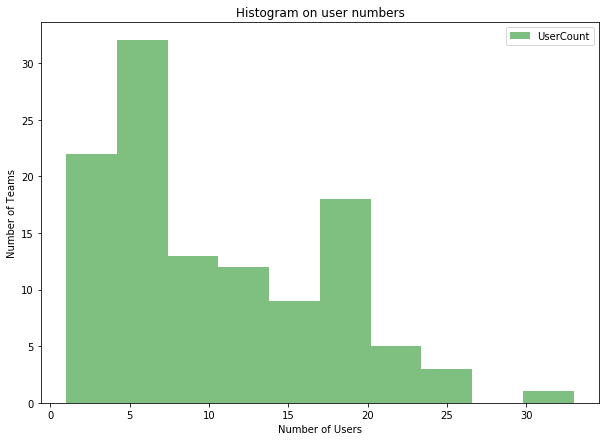

In [ ]:
# your code goes here (Q1c: 4 points)


----

## **Questions 2: Now use the `ad-clicks` dataset to find the number of ad clicks in each hour.**

Keywords: `group by`, `parse timestamp`, `plot`

In [ ]:
timestamp_only = adclicks.selectExpr(["to_timestamp(timestamp) as timestamp"])

click_count_by_hour = # your code goes here (Q2a: 4 points)

click_count_by_hour.show(24) 

+----+----------+
|hour|ClickCount|
+----+----------+
|   0|       605|
|   1|       728|
|   2|       633|
|   3|       552|
|   4|       614|
|   5|       691|
|   6|       710|
|   7|       704|
|   8|       726|
|   9|       799|
|  10|       705|
|  11|       648|
|  12|       714|
|  13|       647|
|  14|       623|
|  15|       695|
|  16|       707|
|  17|       662|
|  18|       686|
|  19|       603|
|  20|       675|
|  21|       756|
|  22|       696|
|  23|       744|
+----+----------+



# Use line plot to show the number of clicks by hour:

Text(0.5, 1.0, 'Number of Clicks by Hour')

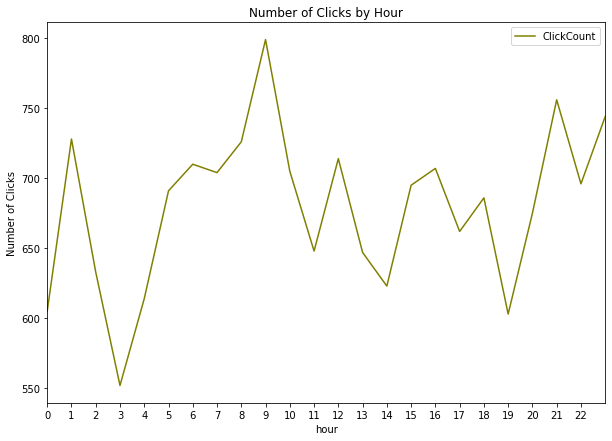

In [ ]:
click_by_hour_pd = click_count_by_hour.toPandas()

# your code goes here (Q2b: 4 points)

## Question 3: Use `map` and `reduce` with RDD

Keywords: `RDD map reduce`

Now we want to find the number of clicks of each `adCategorory` using `map` and `reduce` with RDD. Since we only care the `adCategory`, let's select this column only.

In [ ]:
categoryOnly = adclicks.select("adCategory")
categoryOnly.show(10)


+-----------+
| adCategory|
+-----------+
|electronics|
|     movies|
|  computers|
|    fashion|
|   clothing|
|      games|
|     movies|
|electronics|
|electronics|
|  computers|
+-----------+
only showing top 10 rows



Now use explicit Map/Reduce format with RDDs.

First we emit a pair in the format (`adCategory`, 1) by using a `map()` function:

In [ ]:
all_categories = # your code goes here (Q3a: 3 points)
all_categories.take(5)

[('electronics', 1),
 ('movies', 1),
 ('computers', 1),
 ('fashion', 1),
 ('clothing', 1)]

Then, we sum counts by using a `reduce()` function, and then we sort by count:

In [ ]:
category_counts_rdd = # your code goes here (Q3b: 4 points)
category_counts_rdd.take(3)

[('computers', 2638), ('games', 2601), ('clothing', 2340)]

Now we want to convert the `category_counts_rdd` to a dataframe `category_counts` by mappying the corresponding columns.

In [ ]:
category_counts = # your code goes here (Q3c: 4 points)
category_counts.show()

+--------------+-----------+
|CategoriyCount| adCategory|
+--------------+-----------+
|          2638|  computers|
|          2601|      games|
|          2340|   clothing|
|          2074|     sports|
|          1727|    fashion|
|          1692|     movies|
|          1588|   hardware|
|          1097|electronics|
|           566| automotive|
+--------------+-----------+



Now use SparkSQL to verify the above result:

In [ ]:
#print(adclicks.count())

adclicks.registerTempTable("adclicks")

query = # your code goes here (Q3d: 1 point)

category_counts = spark.sql(query)
category_counts.show()


+-----------+-------------+
| adCategory|CategoryCount|
+-----------+-------------+
|  computers|         2638|
|      games|         2601|
|   clothing|         2340|
|     sports|         2074|
|    fashion|         1727|
|     movies|         1692|
|   hardware|         1588|
|electronics|         1097|
| automotive|          566|
+-----------+-------------+



#Congratulations on the first Spark assignment!